In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# 1: Load, Read, and understand the dataset

In [2]:
# Loading and then reading the file using pandas
data_file = pd.read_csv(r"C:\Users\tyler\Desktop\car_price_prediction\Data\CarPrice_Assignment.csv")

# Return first 5 rows of the dataset
data_file.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
data_file.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [4]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Cleaning and Preparing Data

In [5]:
# We're going to check if there are any missing values
data_file.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
# We're going to check if there are any duplicate id values
sum(data_file.duplicated(subset = 'car_ID')) == 0

True

### Exploratory Analysis

In [7]:
data_file.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


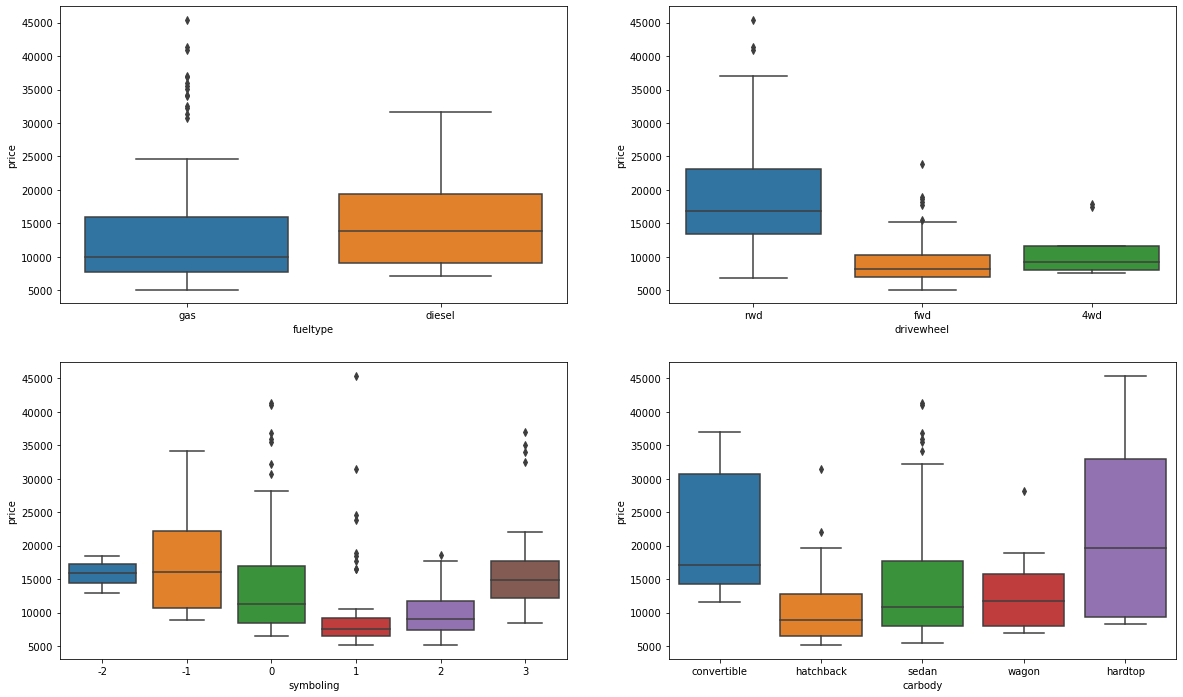

In [8]:
# Some comparisons regarding the type of car and the price difference. Represented by box plots
plt.figure(figsize = (20,12))

plt.subplot(2,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = data_file)

plt.subplot(2,2,2)
sns.boxplot(x = 'drivewheel', y = 'price', data = data_file)

plt.subplot(2,2,3)
sns.boxplot(x = 'symboling', y = 'price', data = data_file)

plt.subplot(2,2,4)
sns.boxplot(x = 'carbody', y = 'price', data = data_file)
plt.show()

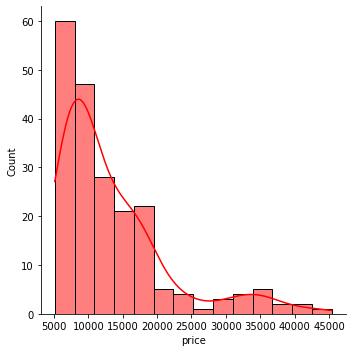

In [9]:
# Distribution plot for price
sns.displot(data_file["price"],color="r",kde=True)

### The top two visual representations show some good information, but not enough to go on for price prediction. We will next use a heatmap to show correlations with price

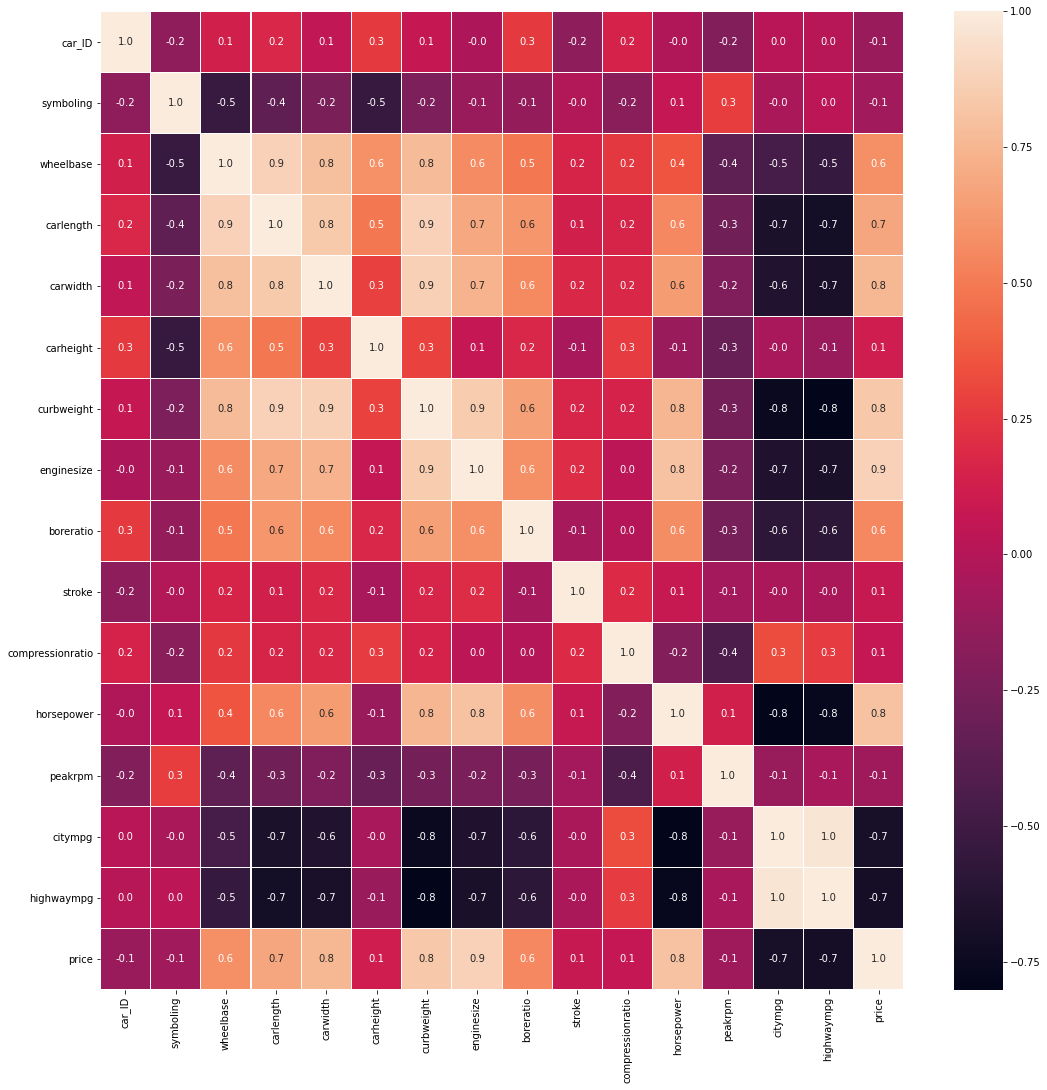

In [10]:
# We will use a heatmap to show which components have the highest correlation for price
plt.figure(figsize = (18, 18))
train_corr = data_file.corr()
sns.heatmap(train_corr, annot=True, fmt='.1f', linewidths = 0.05);

So it seems that the items with the highest correlation for price are: wheelbase, carlength, carwidth, curbweight, enginesize, boreratio, and horsepower. We'll focus on using those items in our prediction. Let's look at how they're represented with scatterplots

<AxesSubplot:xlabel='price', ylabel='wheelbase'>

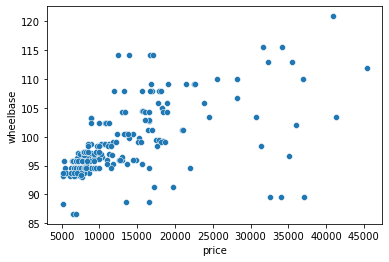

In [11]:
sns.scatterplot(data=data_file, x='price', y='wheelbase')

<AxesSubplot:xlabel='price', ylabel='carlength'>

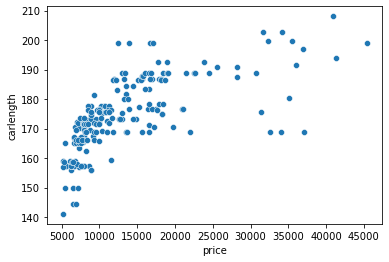

In [12]:
sns.scatterplot(data=data_file, x='price', y='carlength')

<AxesSubplot:xlabel='price', ylabel='carwidth'>

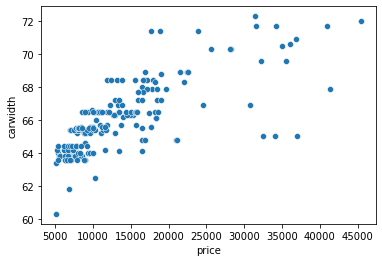

In [13]:
sns.scatterplot(data=data_file, x='price', y='carwidth')

<AxesSubplot:xlabel='price', ylabel='curbweight'>

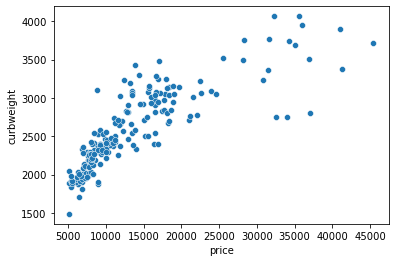

In [14]:
sns.scatterplot(data=data_file, x='price', y='curbweight')

<AxesSubplot:xlabel='price', ylabel='enginesize'>

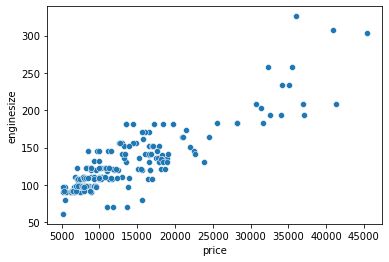

In [15]:
sns.scatterplot(data=data_file, x='price', y='enginesize')

<AxesSubplot:xlabel='price', ylabel='boreratio'>

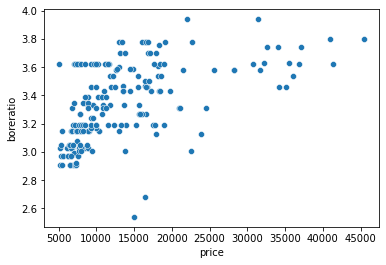

In [16]:
sns.scatterplot(data=data_file, x='price', y='boreratio')

<AxesSubplot:xlabel='price', ylabel='horsepower'>

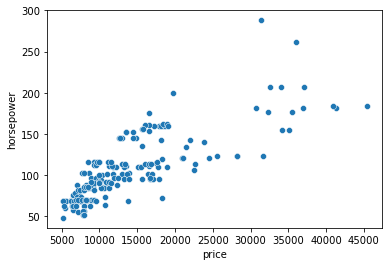

In [17]:
sns.scatterplot(data=data_file, x='price', y='horsepower')

After representing the data in the form of a scatter plot, it would seem the data is linear in nature (more or less). We will start our prediction using linear regression and if the accuracy of the model is not satisfactory then we'll use a different algorithm

### Let's drop the outliers before we proceed with the algorithm

In [18]:
data_file = data_file.drop(data_file['wheelbase'][data_file['wheelbase'] < 90].index)
data_file = data_file.drop(data_file['carwidth'][data_file['carwidth'] > 71].index)
data_file = data_file.drop(data_file['enginesize'][data_file['enginesize'] > 300].index)
data_file = data_file.drop(data_file['boreratio'][data_file['boreratio'] < 2.8].index)
data_file = data_file.drop(data_file['horsepower'][data_file['horsepower'] > 250].index)

# Algorithm

In [19]:
x = data_file[['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower']]
y = data_file['price']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 15)
regressor = LinearRegression()
# train
regressor.fit(x_train, y_train)

LinearRegression()

In [22]:
predict_y = regressor.predict(x_test)
np.set_printoptions(precision = 2)

In [23]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test, predict_y)
print(f'Accuracy of prediction: {accuracy}')

Accuracy of prediction: 0.7841243567268095


78% is not bad! This will work nicely. Let's look a bit closer

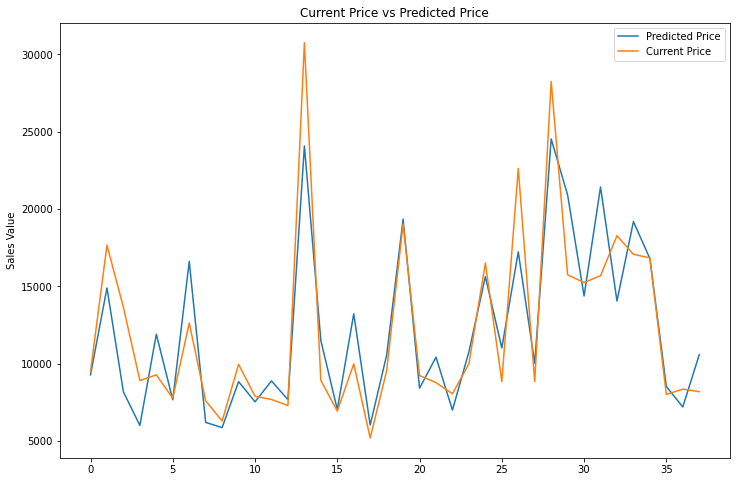

In [24]:
# Representation of the prediction
plt.figure(figsize=(12,8))

plt.title('Current Price vs Predicted Price')
plt.ylabel('Sales Value')
plt.plot(predict_y) #x_test
plt.plot(y_test.values[:100]) #y_test. 100 first values

plt.legend(['Predicted Price', 'Current Price'])
plt.show()

In [28]:
dfv = pd.DataFrame(data={"Current Price": y_test, "Predicted Price": predict_y})
dfv["The Difference"] = dfv["Predicted Price"] - dfv["Current Price"]
dfv

,Current Price,Predicted Price,The Difference
187,9495.0,9278.819961,-216.180039
172,17669.0,14900.494272,-2768.505728
57,13645.0,8178.060575,-5466.939425
45,8916.5,6008.600993,-2907.899007
88,9279.0,11907.647889,2628.647889
142,7775.0,7669.557233,-105.442767
82,12629.0,16614.471840,3985.471840
140,7603.0,6204.536306,-1398.463694
19,6295.0,5870.496228,-424.503772
143,9960.0,8841.899917,-1118.100083


# Application From Algorithm

In [26]:
import tkinter
from tkinter import *
root = tkinter.Tk()
root.title("Car Prediction")
root.minsize(width=800, height=500)
my_label = tkinter.Label(root, text="Car Prediction", font=('Arial', 24)).pack()
desc_lbl = tkinter.Label(root, text='Please enter values to get car\'s predicted price. Should be used by dealership employee.(NOT MEAN\'T FOR CUSTOMERS)').pack()

wheelbase = tkinter.Scale(root, from_=0, to=200, orient=HORIZONTAL, label="Wheel Base")
wheelbase.pack()
carlength = tkinter.Scale(root, from_=0, to=200, orient=HORIZONTAL, label="Car Length")
carlength.pack()
carwidth = tkinter.Scale(root, from_=0, to=100, orient=HORIZONTAL, label="Car Width")
carwidth.pack()
curbweight = tkinter.Scale(root, from_=0, to=4500, orient=HORIZONTAL, label="Curb Weight")
curbweight.pack()
enginesize = tkinter.Scale(root, from_=0, to=300, orient=HORIZONTAL, label="Engine Size")
enginesize.pack()
boreratio = tkinter.Scale(root, from_=0, to=4, orient=HORIZONTAL, label="Bore Ratio")
boreratio.pack()
horsepower = tkinter.Scale(root, from_=0, to=300, orient=HORIZONTAL, label="Horsepower")
horsepower.pack()



def car_prediction():
    prediction = regressor.predict([[
        wheelbase.get(),
        carlength.get(),
        carwidth.get(),
        curbweight.get(),
        enginesize.get(),
        boreratio.get(),
        horsepower.get()]])
    
    predict_label.config(text=f'The car\'s predicted price is: {prediction}')
    
    


my_button = tkinter.Button(root, text="Calculate", command=car_prediction)
my_button.pack(side="bottom")

predict_label = tkinter.Label(root, fg='green', font=('Arial, 14'))
predict_label.pack()


root.mainloop()